In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import livelossplot
import tensorflow


%matplotlib inline

In [2]:
header = ['Target','Ids','Date','Flag','User','Tweet']
df = pd.read_csv(r"H:\My Drive\Intershala internship\Kudosware\training.1600000.processed.noemoticon.csv",encoding='ISO-8859–1', names=header)
df = df[:100]

In [3]:
df['Text'] = df['Tweet'].str.lower()
df['Text'] = df['Text'].map(lambda s: ' '.join([x for x in s.split() if 'http' not in x if '@' not in x]))

In [4]:
df['processed_tweets'] = df['Text'].str.replace('[^\w\s]', '').str.lower()

C:\Users\saksh\AppData\Local\Temp\ipykernel_15044\2399819199.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_tweets'] = df['Text'].str.replace('[^\w\s]', '').str.lower()


In [5]:
df['tokenized_tweets'] = df['processed_tweets'].apply(word_tokenize)

In [6]:
# stop_words = set(stopwords.words('english'))
# df['filtered_tweets'] = df['tokenized_tweets'].apply(lambda x: [word for word in x if word not in stop_words
# stemmer = PorterStemmer()
# df['stemmed_tweets'] = df['tokenized_tweets'].apply(lambda x: [stemmer.stem(word) for word in x])


In [7]:
# lemmatizer = WordNetLemmatizer()
# df['lemmatized_tweets'] = df['tokenized_tweets'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [8]:
df

,Target,Ids,Date,Flag,User,Tweet,Text,processed_tweets,tokenized_tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- awww, that's a bummer. you shoulda got david...",awww thats a bummer you shoulda got david car...,"[awww, thats, a, bummer, you, shoulda, got, da..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to sa...,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am ...",no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why..."
...,...,...,...,...,...,...,...,...,...
95,0,1467836448,Mon Apr 06 22:26:27 PDT 2009,NO_QUERY,Dogbook,Strider is a sick little puppy http://apps.fa...,strider is a sick little puppy,strider is a sick little puppy,"[strider, is, a, sick, little, puppy]"
96,0,1467836500,Mon Apr 06 22:26:28 PDT 2009,NO_QUERY,natalieantipas,"so rylee,grace...wana go steve's party or not?...","so rylee,grace...wana go steve's party or not?...",so ryleegracewana go steves party or not sadly...,"[so, ryleegracewana, go, steves, party, or, no..."
97,0,1467836576,Mon Apr 06 22:26:29 PDT 2009,NO_QUERY,timdonnelly,"hey, I actually won one of my bracket pools! T...","hey, i actually won one of my bracket pools! t...",hey i actually won one of my bracket pools too...,"[hey, i, actually, won, one, of, my, bracket, ..."
98,0,1467836583,Mon Apr 06 22:26:29 PDT 2009,NO_QUERY,homeworld,"@stark YOU don't follow me, either and i work...","you don't follow me, either and i work for you!",you dont follow me either and i work for you,"[you, dont, follow, me, either, and, i, work, ..."


In [9]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(df['tokenized_tweets'])

vocab_size = len(tokenizer.word_index) + 1

sequence = tokenizer.texts_to_sequences(df['tokenized_tweets'])


In [10]:
input_sequences = []
for token in sequence:
    for i in range(1, len(token)):
        n_gram_sequence = token[:i+1]
        input_sequences.append(n_gram_sequence)

In [11]:
max_len = max(len(seq) for seq in sequence)
print(max_len)
pad_seq = pad_sequences(input_sequences, maxlen=max_len, padding='pre')
inputs, label = pad_seq[:,:-1],pad_seq[:,-1]

29


In [12]:
import keras.utils as ku
label = ku.to_categorical(label, num_classes=vocab_size)

train_size = int(0.8 * len(input_sequences))
train_input = input[:train_size]
train_output = label[:train_size]
test_input = input[train_size:]
test_output = label[train_size:]

In [13]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim , input_length=max_len-1,))
# model.add(Bidirectional(LSTM(200)))
# model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(LSTM(128))
model.add(Dropout(0.2)) 
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dropout(0.5)) 
model.add(Dense(vocab_size,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 100)           63300     
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 633)               81657     
                                                                 
Total params: 262,205
Trainable params: 262,205
Non-trainable params: 0
_________________________________________________________________


In [14]:
plot_losses = livelossplot.PlotLossesKeras()

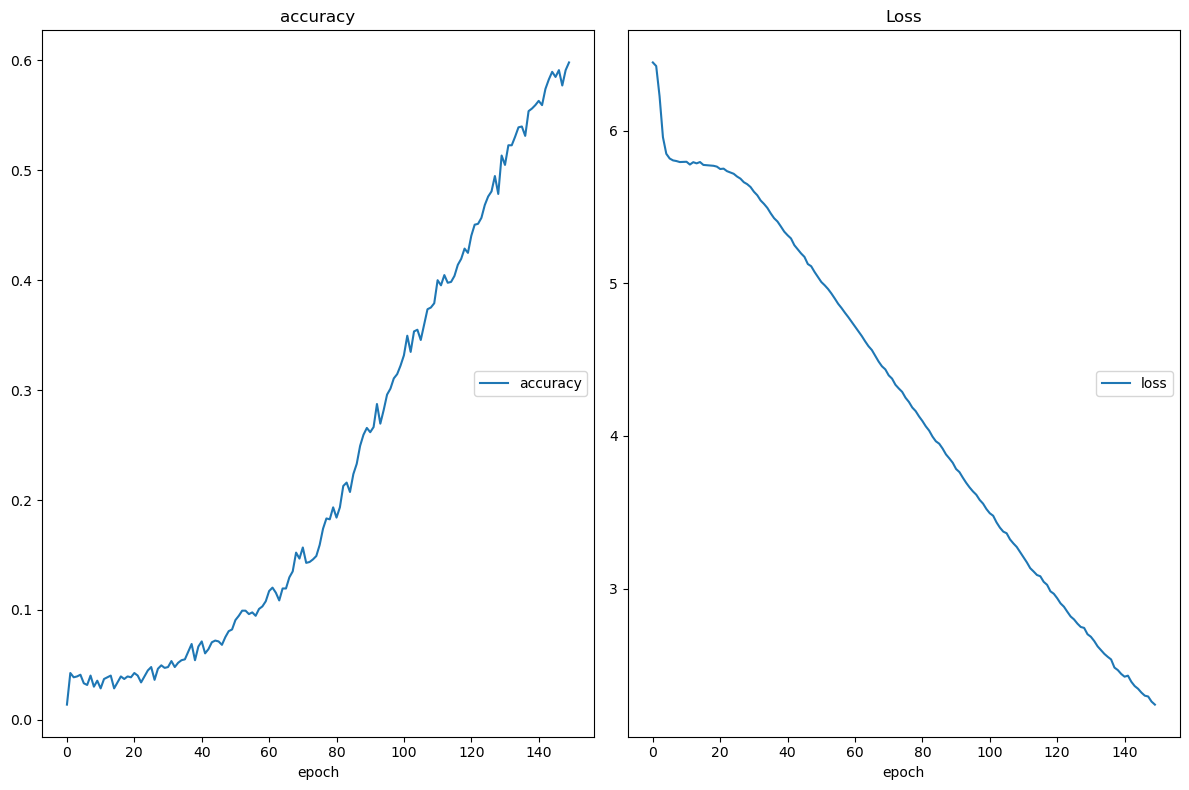

accuracy
	accuracy         	 (min:    0.014, max:    0.598, cur:    0.598)
Loss
	loss             	 (min:    2.240, max:    6.448, cur:    2.240)
Test loss: 2.136536121368408
Test accuracy: 0.6552795171737671


In [15]:
model.fit(inputs, label,batch_size=256 ,epochs=150, verbose=5,callbacks=[plot_losses])
score = model.evaluate(inputs, label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [30]:
def generate_tweet(model, tokenizer, seed_text,length):

    input_text = seed_text

    for _ in range(length):
        encoded = tokenizer.texts_to_sequences([input_text])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')
        predicted_word_index = np.argmax(model.predict(encoded), axis=-1)[0]
        predicted_word = ''

        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                predicted_word = word
                break

        input_text += ' ' + predicted_word

    return input_text.title()

seed_text = "I am feeling"
generated_tweet = generate_tweet(model, tokenizer, seed_text,14)
print(generated_tweet)

1/1 [==============================] - 0s 31ms/step
I Am Feeling I Dont Think My Phone Smells Like Citrus And Me And I Still Think
